In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
from matplotlib import style
import random

#### Generate dummy data

In [4]:
def generate_data(n, variance, step=2, corelation=False):
    val = 1
    y = []
    for _ in range(n):
        result = val + random.randrange(-variance, variance)
        y.append(result)
        
        if corelation == 'pos':
            val += step
        if corelation == 'neg':
            val -= step
    X = [i for i in range(len(y))]
    
    return np.array(X, dtype='float64'), np.array(y, dtype='float64')

X, y = generate_data(50, 20, corelation='pos')


#### Plot the data points

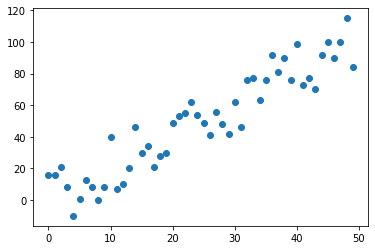

In [5]:
plt.scatter(X, y)
plt.show()

#### Define the best fit slope and y-intercept for the given data points

In [6]:
def best_fit_slope_and_y_intercept(X, y):
    m = (mean(X) * mean(y) - mean(X*y)) / (mean(X)**2 - mean(X**2))
    b = mean(y) - (m * mean(X))
    return m, b
m, b = best_fit_slope_and_y_intercept(X, y)
m, b

(2.0568067226890765, -0.49176470588237464)

#### Define the regression function using which we can predict y for any given value of X

In [7]:
def regression_y(X, m, b):
    return m*X+b

reg_y = regression_y(X, m, b)

#### Plot the regression function along with the data points

In [8]:
style.use('fivethirtyeight')

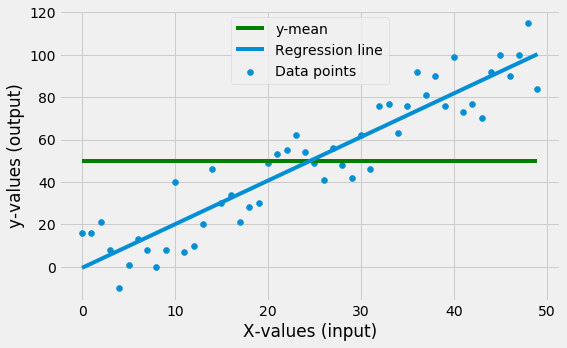

In [61]:
# Display actual regression line along with the y-mean (this is also an example of positive r-squared value)
plt.figure(1, figsize=(8, 5))
plt.scatter(X, y)
plt.plot(X, [mean(y)]*50, color='g')
plt.plot(X, reg_y)
plt.legend(('y-mean', 'Regression line', 'Data points'), loc=9)
plt.xlabel('X-values (input)')
plt.ylabel('y-values (output)')
plt.show()

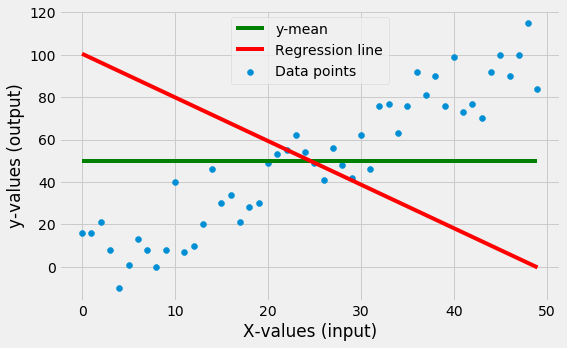

In [63]:
# Display an imaginary example of rgression line for which r-squared value would have been negative
plt.figure(1, figsize=(8,5))
plt.scatter(X, y)
plt.plot(X, [mean(y)]*50, color='g')
plt.plot(X, -reg_y+100, color='r')
plt.legend(('y-mean', 'Regression line', 'Data points'), loc=9)
plt.xlabel('X-values (input)')
plt.ylabel('y-values (output)')
plt.show()

#### Predict 'y' value using above regression function

In [168]:
def predict_y(X):
    return m*X + b

x_predict = 55
y_prediction = predict_y(x_predict)
y_prediction

110.06300120048019

#### Plot the prediction (in RED) on the same plot

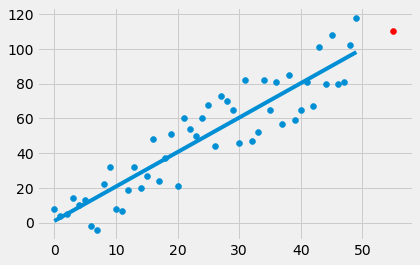

In [169]:
plt.scatter(X, y)
plt.plot(X, reg_y)
plt.scatter(x_predict, y_prediction, color= 'red')
plt.show()

#### Evaluate the 'accuracy' of above regression which is the 'coefficient of determination' which is 'r-squared value'

In [170]:
def coefficient_of_determination(X, y):
    SE_regression = sum([((m*X + b) - y)**2 for X, y in zip(X, y)])
    SE_ymean = sum([(i-mean(y))**2 for i in y])
    coefficient_of_determination = 1 - (SE_regression/SE_ymean)
    
    return coefficient_of_determination

r_squared = coefficient_of_determination(X, y)
r_squared    # this is the accuracy

0.839349801774368